<div style="background-color:#e8f2ff; padding:18px; border-radius:10px;">

<h2 style="color:#0b3c8c; margin-bottom:6px;">
QUANTITATIVE TRADING STRATEGY 
</h2>

<h4 style="color:#1f4fd8; margin-top:0;">
Hypothesis &nbsp;→&nbsp; Data Preparation &nbsp;→&nbsp; Rule Formalization &nbsp;→&nbsp; Backtesting &nbsp;→&nbsp; Evaluation &nbsp; 
</h4>

<p style="margin-top:10px;">
This section covers the complete workflow for building a quantitative trading strategy:
</p>

<ul>
  <li><b>Hypothesis</b> – Formulating a testable market belief or trading edge.</li>
  <li><b>Data Preparation</b> – Collecting, cleaning, and validating historical market data.</li>
  <li><b>Rule Formalization</b> – Computing indicators and generating signals with precise entry and exit rules.</li>
  <li><b>Backtesting</b> – Testing the rules on past data with realistic execution assumptions.</li>
  <li><b>Evaluation</b> – Assessing performance, risk, drawdowns, and robustness.</li>
  </ul>
</div>

<div style="background-color:#e8f2ff; padding:14px 18px; border-radius:8px;">
  <h2 style="color:#0b3c8c; margin:0;">
    CORE WORKFLOW :
  </h2>
</div>

### 📌 Step 1: Strategy Setup
Determine the asset to build the strategy on  
Define entry and exit rules

### 📊 Step 2: Data Preparation
Import historical data  
Perform data sanity checks

### 🧮 Step 3: Computing Indicators
Calculate technical indicators  
Calculate asset daily % change

### 📈 Step 4: Exploratory Visualization
Plot the asset price (line chart) and other indicators

### ⚙️ Step 5: Signal Generation
Generate trading signals - Avoid lookahead bias

### 🖥️ Step 6: Signal Visualization
Plot asset price with generated signals for visual confirmation 

### 📉 Step 7: Return Visualization
Plot strategy returns and asset returns on the same chart to compare the equity curves

### 💰 Step 8: Strategy Computation
Calculate strategy returns vs asset returns

### 📐 Step 9: Trading Strategy Statistical Evaluation
Generate performance statistics using PyFolio or QuantStats

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Strategy 1: Trend Following | Moving Average (Short MA > Long MA)

**Strategy Rules**

- Compute **MA 50** and **MA 200**
- **Go Long** when MA 50 is **above** MA 200
- **Exit** when MA 50 is **below** MA 200

</div>

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation

In [23]:
start_date = "2010-01-01"
end_date = "2024-12-31"
data = yf.download("KPITTECH.NS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [24]:
data.head(2)

Price,Close,High,Low,Open,Volume
Ticker,KPITTECH.NS,KPITTECH.NS,KPITTECH.NS,KPITTECH.NS,KPITTECH.NS
Date,,,,,
2019-04-22,99.140793,99.140793,89.698818,94.419805,1066838
2019-04-23,104.052536,104.052536,100.666780,104.052536,746528


In [25]:
data.columns = ['close', 'high', 'low', 'open', 'volume']

In [26]:
data.head(2)

,close,high,low,open,volume
Date,,,,,
2019-04-22,99.140793,99.140793,89.698818,94.419805,1066838
2019-04-23,104.052536,104.052536,100.666780,104.052536,746528


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407 entries, 2019-04-22 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1407 non-null   float64
 1   high    1407 non-null   float64
 2   low     1407 non-null   float64
 3   open    1407 non-null   float64
 4   volume  1407 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 66.0 KB


In [28]:
df = data.copy()

### Compute MA50 and MA200

In [29]:
#Compute MA 50 and MA 200
df['ma50'] = df['close'].rolling(window=50).mean()
df['ma200'] = df['close'].rolling(window=200).mean()

In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1208 entries, 2020-02-11 to 2024-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1208 non-null   float64
 1   high    1208 non-null   float64
 2   low     1208 non-null   float64
 3   open    1208 non-null   float64
 4   volume  1208 non-null   int64  
 5   ma50    1208 non-null   float64
 6   ma200   1208 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 75.5 KB


### Plot the price chart and the indicators for Exploratory Visualization

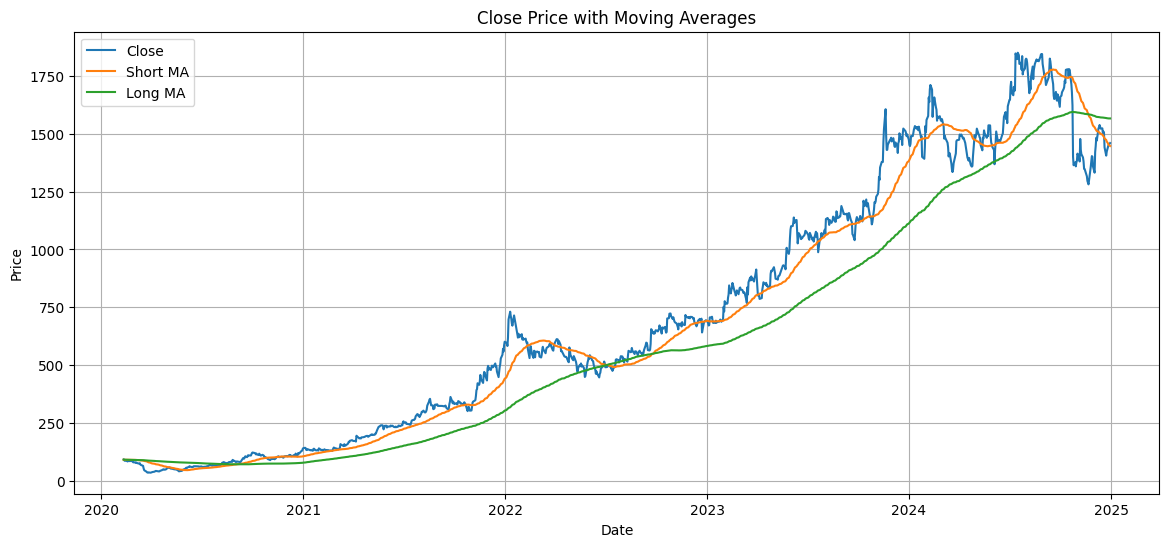

In [32]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['ma50'], label='Short MA')
plt.plot(df.index, df['ma200'], label='Long MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Generate signals and final positions

In [33]:
#Go long when MA 50 is above MA 200
#Exit when MA 50 is below MA 200

df['signal'] = np.where(df['ma50'] > df['ma200'], 1, 0)
df['position'] = df['signal'].shift(1)

In [34]:
df.head()

,close,high,low,open,volume,ma50,ma200,signal,position
Date,,,,,,,,,
2020-02-11,91.522659,96.091578,90.512685,95.129700,129514,90.056765,90.506660,0,NaN
2020-02-12,87.578972,92.725016,86.809467,91.378386,153058,90.048108,90.448851,0,0.0
2020-02-13,85.559021,88.637034,84.789523,87.675156,88598,89.980777,90.356383,0,0.0
2020-02-14,86.376625,87.530875,84.597145,85.559023,157871,89.992319,90.242014,0,0.0
2020-02-17,84.392616,90.489792,82.747350,88.554182,195849,89.968029,90.133939,0,0.0


In [35]:
df['position'].value_counts()

position
1.0    993
0.0    214
Name: count, dtype: int64

### Plot signals with price chart and indicators

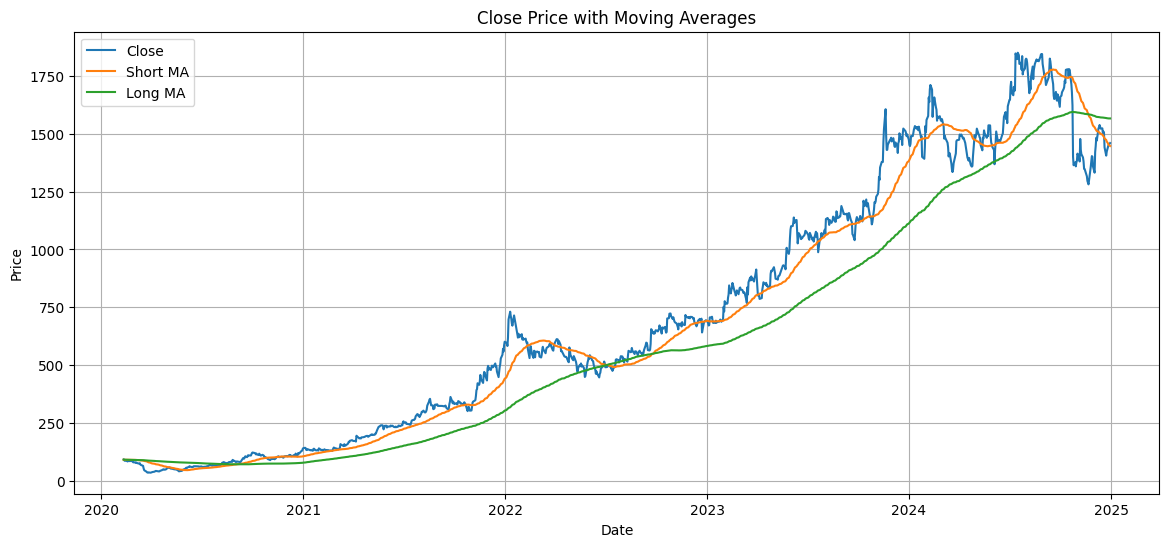

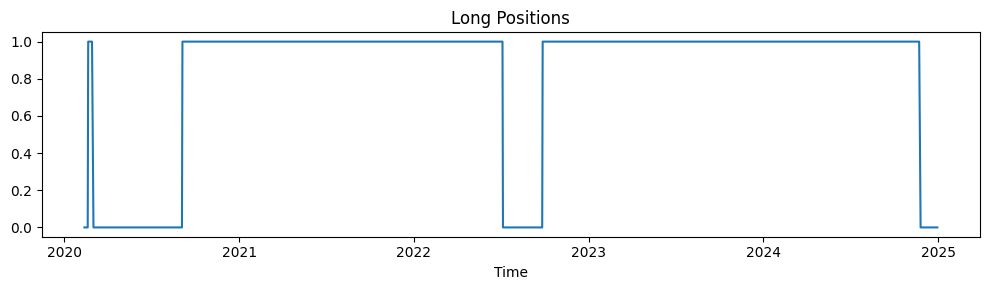

In [36]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['ma50'], label='Short MA')
plt.plot(df.index, df['ma200'], label='Long MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot signals graphs
plt.figure(figsize=(10, 3))
plt.plot(df['position'])
plt.title("Long Positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

### Compute daily asset returns and strategy returns

In [37]:
df['asset_returns'] = df['close'].pct_change()
df['strategy_returns'] = df['position'] * df['asset_returns']

### Convert returns into equity growth  

In [38]:
df['asset_returns_eq'] = (1 + df['asset_returns'])
df['strategy_returns_eq'] = (1 + df['strategy_returns'])

In [39]:
df = df.dropna()

In [40]:
df.head()

,close,high,low,open,volume,ma50,ma200,signal,position,asset_returns,strategy_returns,asset_returns_eq,strategy_returns_eq
Date,,,,,,,,,,,,,
2020-02-12,87.578972,92.725016,86.809467,91.378386,153058,90.048108,90.448851,0,0.0,-0.043090,-0.0,0.956910,1.0
2020-02-13,85.559021,88.637034,84.789523,87.675156,88598,89.980777,90.356383,0,0.0,-0.023064,-0.0,0.976936,1.0
2020-02-14,86.376625,87.530875,84.597145,85.559023,157871,89.992319,90.242014,0,0.0,0.009556,0.0,1.009556,1.0
2020-02-17,84.392616,90.489792,82.747350,88.554182,195849,89.968029,90.133939,0,0.0,-0.022969,-0.0,0.977031,1.0
2020-02-18,82.698967,85.650776,81.827948,84.392626,124666,89.944494,90.029317,0,0.0,-0.020069,-0.0,0.979931,1.0


### Compounding equity : ₹1 became how much?

In [41]:
returns = df['strategy_returns_eq_cum'] = df['strategy_returns_eq'].cumprod()
asset = df['asset_returns_eq_cum'] = df['asset_returns_eq'].cumprod()

In [42]:
print("Strategy Returns", np.round(returns.iloc[-1], 2))
print("Asset Returns", np.round(asset.iloc[-1], 2))

Strategy Returns 11.09
Asset Returns 15.96


### Shorter plotting code

In [43]:
#df[['asset_returns_cum', 'strategy_returns_eq_cum']].plot(figsize=(14,6), grid=True, title="Asset vs Strategy Equity");

### Plotting both equity curves  

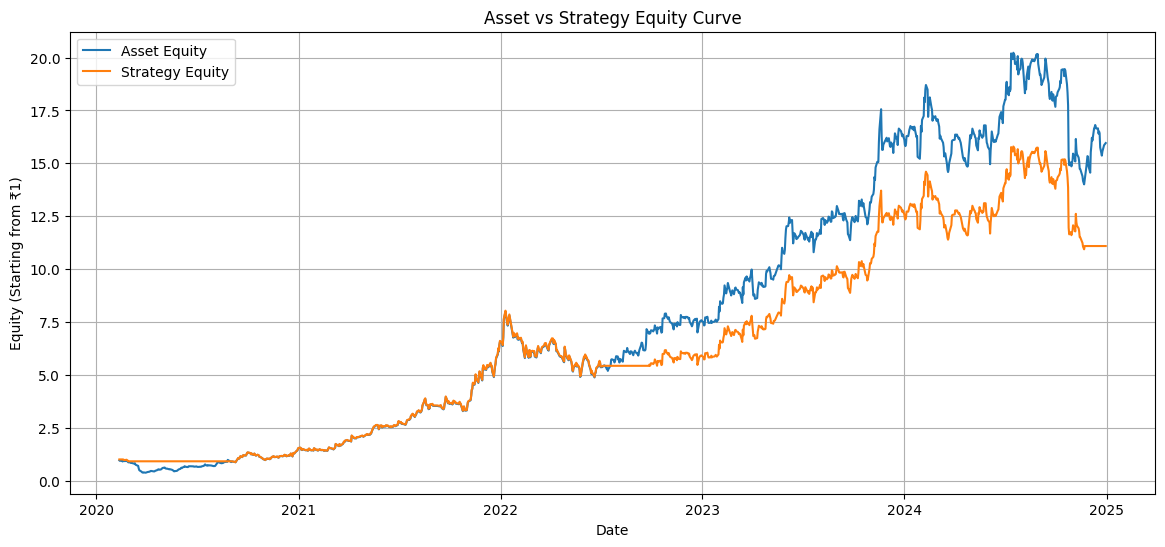

In [44]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['asset_returns_eq_cum'], label='Asset Equity')
plt.plot(df.index, df['strategy_returns_eq_cum'], label='Strategy Equity')
plt.title("Asset vs Strategy Equity Curve")
plt.xlabel("Date")
plt.ylabel("Equity (Starting from ₹1)")
plt.legend()
plt.grid(True)
plt.show()

**Syntax (Excel / CSV):**  
`df.to_excel("file_name.xlsx")`  
`df.to_csv("file_name.csv")`

**Explanation:**  
Exports the DataFrame to Excel or CSV format, preserving rows and columns for external use or sharing.

## Generating Pyfolio Report

**Syntax (PyFolio Simple Tear Sheet):**  
`pf.create_simple_tear_sheet(strategy_returns)`

**Explanation:**  
Pass the **daily `pct_change` strategy returns** to generate a concise performance report with returns, risk metrics, drawdowns, and equity curves.


Start date,2020-02-12
End date,2024-12-30
Total months,57
,Backtest
Annual return,65.254%
Cumulative returns,1008.855%
Annual volatility,40.963%
Sharpe ratio,1.43
Calmar ratio,1.68
Stability,0.91
Max drawdown,-38.919%


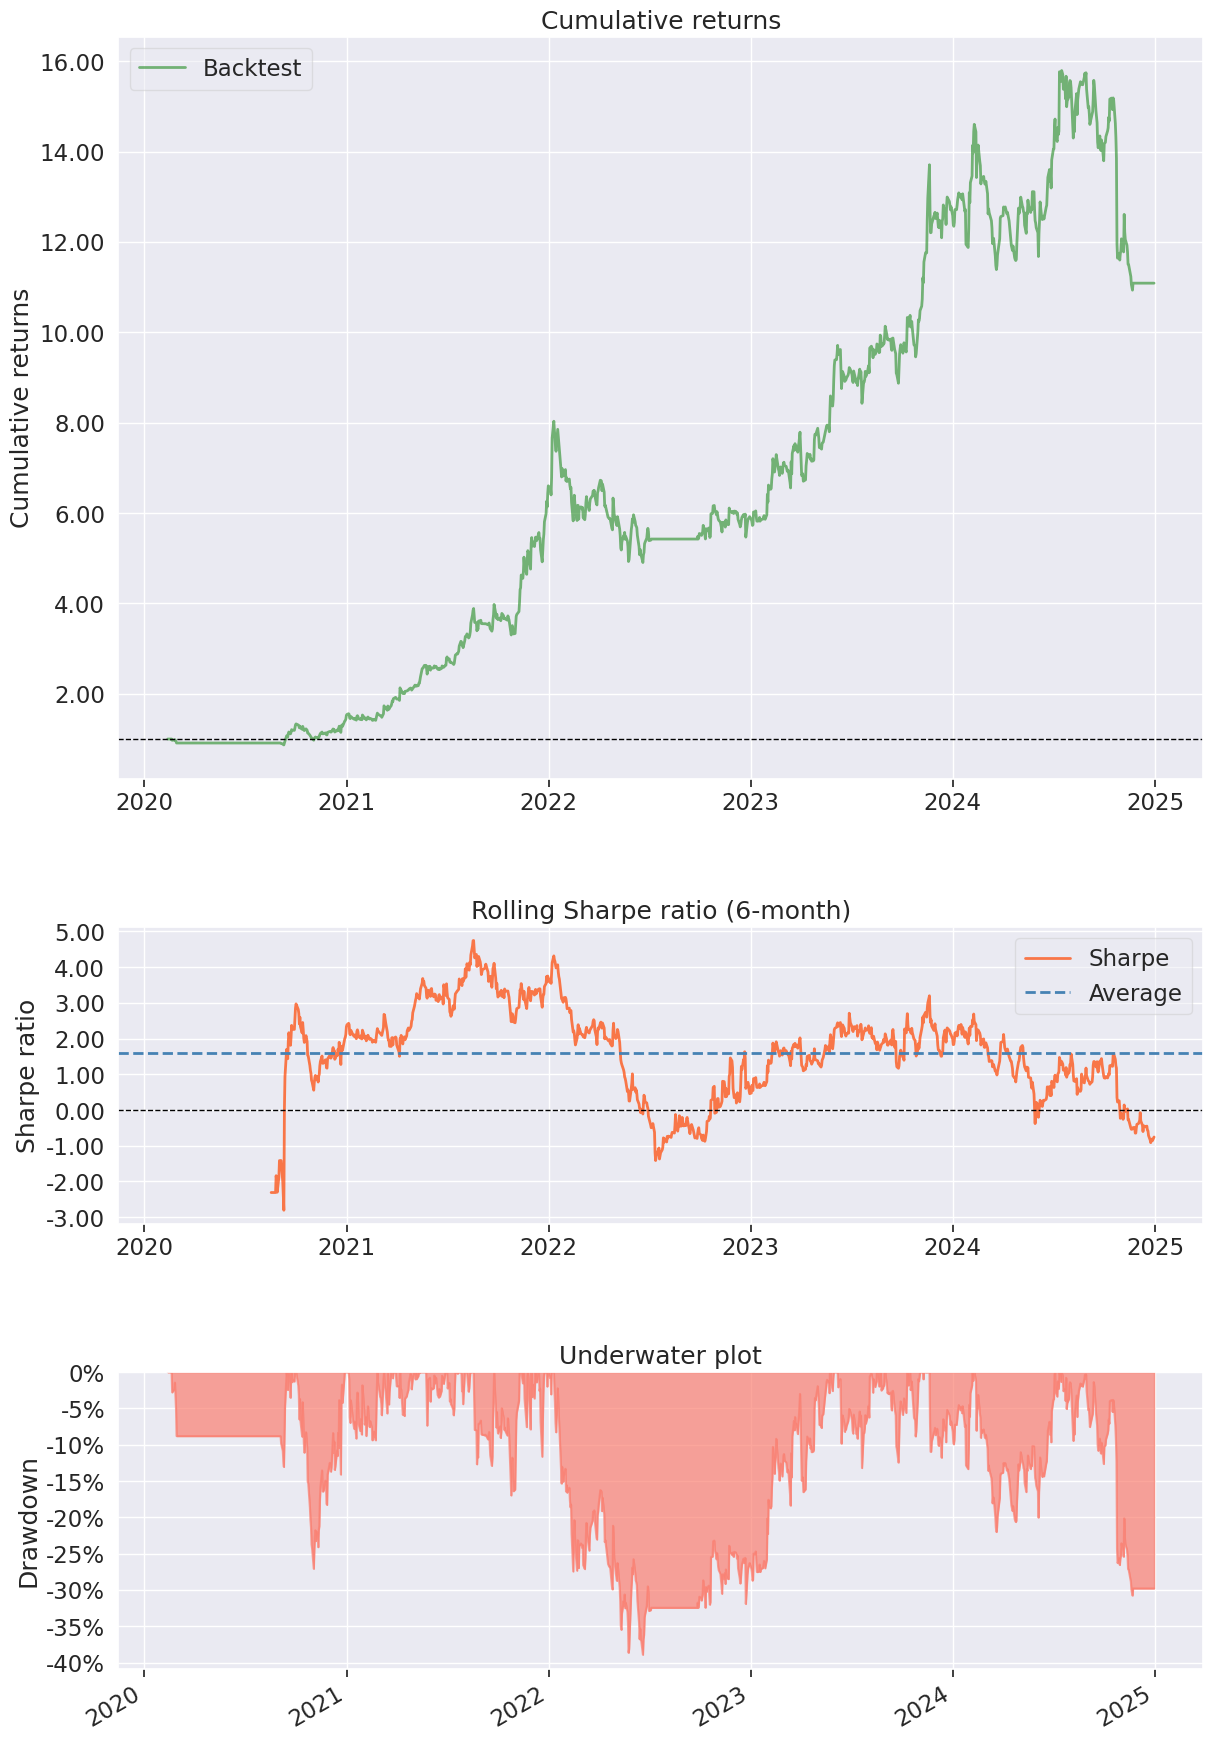

In [45]:
import pyfolio as pf
pf.create_simple_tear_sheet(df['strategy_returns'])

## Generating Quantstats Report

**Syntax (QuantStats Report with Benchmark):**  
`qs.reports.basic(strategy_returns, benchmark=asset_returns)`

**Explanation:**  
`strategy_returns` are the daily `pct_change` strategy returns, while `asset_returns` are used as the benchmark to compare performance, drawdowns, and risk metrics against the underlying asset.

                     Benchmark    Strategy
-------------------  -----------  ----------
Start Period         2020-02-20   2020-02-20
End Period           2024-12-30   2024-12-30
Risk-Free Rate       0.0%         0.0%
Time in Market       100.0%       83.0%

Cumulative Return    1,583.16%    1,008.86%
CAGR﹪               80.83%       65.67%

Sharpe               1.5          1.43
Prob. Sharpe Ratio   99.95%       99.94%
Sortino              2.4          2.41
Sortino/√2           1.69         1.7
Omega                1.32         1.32

Max Drawdown         -60.8%       -38.92%
Max DD Date          2020-03-26   2022-06-20
Max DD Period Start  2020-02-20   2022-01-11
Max DD Period End    2020-08-25   2023-05-23
Longest DD Days      385          498

Gain/Pain Ratio      0.3          0.32
Gain/Pain (1M)       1.73         2.52

Payoff Ratio         1.24         1.24
Profit Factor        1.3          1.32
Common Sense Ratio   1.85         1.98
CPC Index            0.84         0.85
Tail Rati

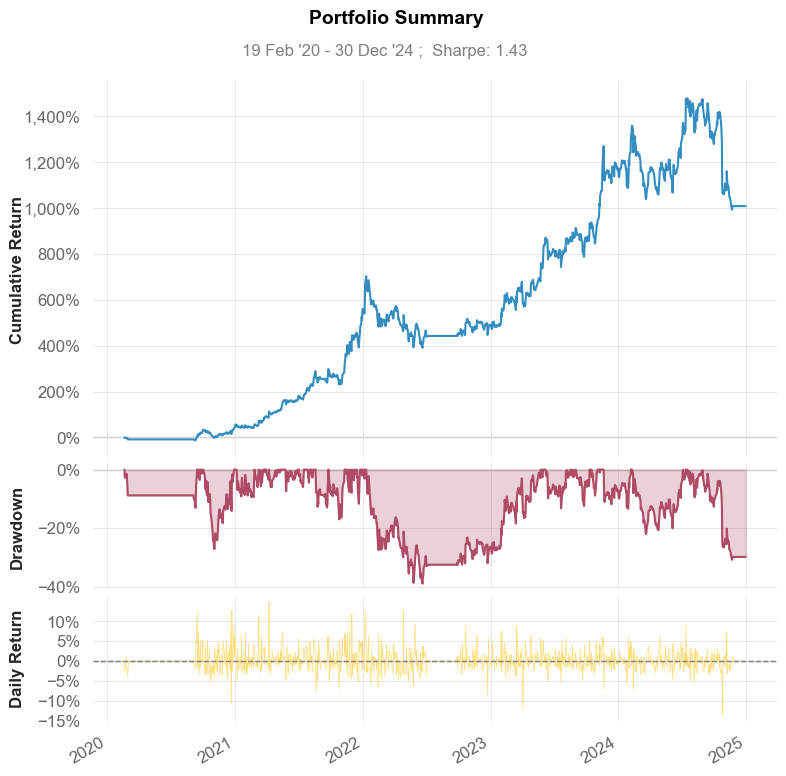

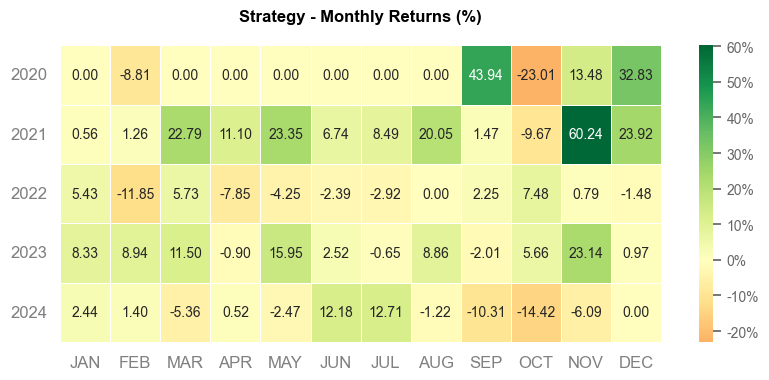

In [71]:
import quantstats as qs
qs.reports.basic(df['strategy_returns'], benchmark=df['asset_returns'])

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Strategy 2: Momentum | (Short EMA > Long EMA) & (ROC > 0)

**Strategy Rules**

- For Determining Trend: Compute **EMA 50** and **EMA 200**
- For Determining Momentum: Compute **ROC (20)**
- **Go Long** when EMA 50 is **above** EMA 200 and ROC is **above 0**
- **else Exit** 
</div>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
start_date = "2015-01-01"
end_date = "2022-11-30"
data1 = yf.download("^NSEI", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [48]:
data1.head(2)

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200


In [49]:
data1.columns = ['close', 'high', 'low', 'open', 'volume' ]

In [50]:
data1.head(2)

,close,high,low,open,volume
Date,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200


In [51]:
df1 = data1.copy()

In [52]:
df1['ema_short'] = df1['close'].ewm(span=50).mean()
df1['ema_long'] = df1['close'].ewm(span=200).mean()

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1945 entries, 2015-01-02 to 2022-11-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1945 non-null   float64
 1   high       1945 non-null   float64
 2   low        1945 non-null   float64
 3   open       1945 non-null   float64
 4   volume     1945 non-null   int64  
 5   ema_short  1945 non-null   float64
 6   ema_long   1945 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.6 KB


In [54]:
df1.head()

,close,high,low,open,volume,ema_short,ema_long
Date,,,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900,8395.450195,8395.450195
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,8386.754795,8386.882668
2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,8296.805239,8299.505268
2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,8245.170230,8249.411251
2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,8242.883663,8246.389381


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1945 entries, 2015-01-02 to 2022-11-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1945 non-null   float64
 1   high       1945 non-null   float64
 2   low        1945 non-null   float64
 3   open       1945 non-null   float64
 4   volume     1945 non-null   int64  
 5   ema_short  1945 non-null   float64
 6   ema_long   1945 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.6 KB


In [56]:
# Compute the technical indicator
n = 20  # lookback period,# Rate of change (normalized momentum)
df1['roc'] = ((df1['close'] / df1['close'].shift(n)) - 1) * 100
print(df1[['close', 'roc']].tail(12))

                   close       roc
Date                              
2022-11-14  18329.150391  7.727599
2022-11-15  18403.400391  7.085549
2022-11-16  18409.650391  6.341626
2022-11-17  18343.900391  4.900518
2022-11-18  18307.650391  4.541966
2022-11-21  18159.949219  3.393314
2022-11-22  18244.199219  3.799994
2022-11-23  18267.250000  3.025817
2022-11-24  18484.099609  4.688115
2022-11-25  18512.750000  4.373925
2022-11-28  18562.750000  4.362500
2022-11-29  18618.050781  3.363562


In [57]:
condition1 = df1['roc'] > 0
condition2 = df1['ema_short'] > df1['ema_long']

In [58]:
df1['signal'] = np.where((condition1 & condition2), 1, 0)

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1945 entries, 2015-01-02 to 2022-11-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1945 non-null   float64
 1   high       1945 non-null   float64
 2   low        1945 non-null   float64
 3   open       1945 non-null   float64
 4   volume     1945 non-null   int64  
 5   ema_short  1945 non-null   float64
 6   ema_long   1945 non-null   float64
 7   roc        1925 non-null   float64
 8   signal     1945 non-null   int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 144.4 KB


In [60]:
df1['position'] = df1['signal'].shift()

In [61]:
df1['signal'].value_counts()

signal
0    1003
1     942
Name: count, dtype: int64

In [62]:
df1 = df1.dropna()

### Plotting Price, MA's, ROC, Position 

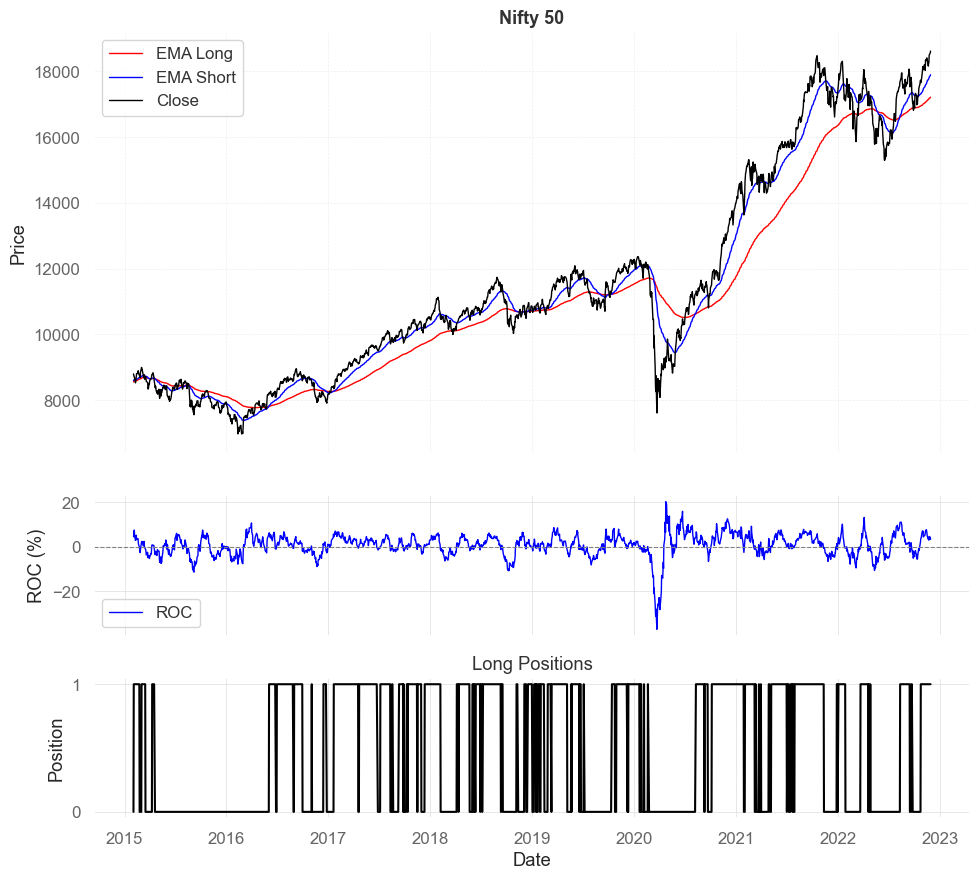

In [63]:
import matplotlib.pyplot as plt
# Create 3 subplots: Price, ROC, Signals
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, figsize=(10, 9), sharex=True,
    gridspec_kw={'height_ratios': [3, 1, 1]}
)

# --- Price Chart ---
ax1.plot(df1.index, df1['ema_long'], color='red', linewidth=1, label='EMA Long')
ax1.plot(df1.index, df1['ema_short'], color='blue', linewidth=1, label='EMA Short')
ax1.plot(df1.index, df1['close'], color='black', linewidth=1, label='Close')
ax1.set_title("Nifty 50", fontsize=13, fontweight='bold')
ax1.set_ylabel("Price")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# --- ROC Chart ---
ax2.plot(df1.index, df1['roc'], color='blue', linewidth=1, label='ROC')
ax2.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax2.set_ylabel("ROC (%)")
ax2.grid(True)
ax2.legend()

# --- Signals Chart ---
ax3.plot(df1.index, df1['position'], color='black')
ax3.set_title("Long Positions")
ax3.set_xlabel("Date")
ax3.set_ylabel("Position")
ax3.set_yticks([0, 1])   # only show 0 and 1
ax3.grid(True)

plt.tight_layout()
plt.show()

In [64]:
df1['asset_returns'] = df1['close'].pct_change()
df1['strategy_returns'] = df1['position'] * df1['asset_returns']

In [65]:
df1['asset_returns_eq'] = (1 + df1['asset_returns'])
df1['strategy_returns_eq'] = (1 + df1['strategy_returns'])

In [66]:
df1['asset_returns_eq_cum'] = df1['asset_returns_eq'].cumprod()
df1['strategy_returns_eq_cum'] = df1['strategy_returns_eq'].cumprod()

In [67]:
returns1 = df1['strategy_returns_eq_cum'].dropna()
asset1 = df1['asset_returns_eq_cum'].dropna()

In [68]:
print("Strategy Returns", np.round(returns1.iloc[-1], 2))
print("Asset Returns", np.round(asset1.iloc[-1], 2))

Strategy Returns 1.62
Asset Returns 2.12


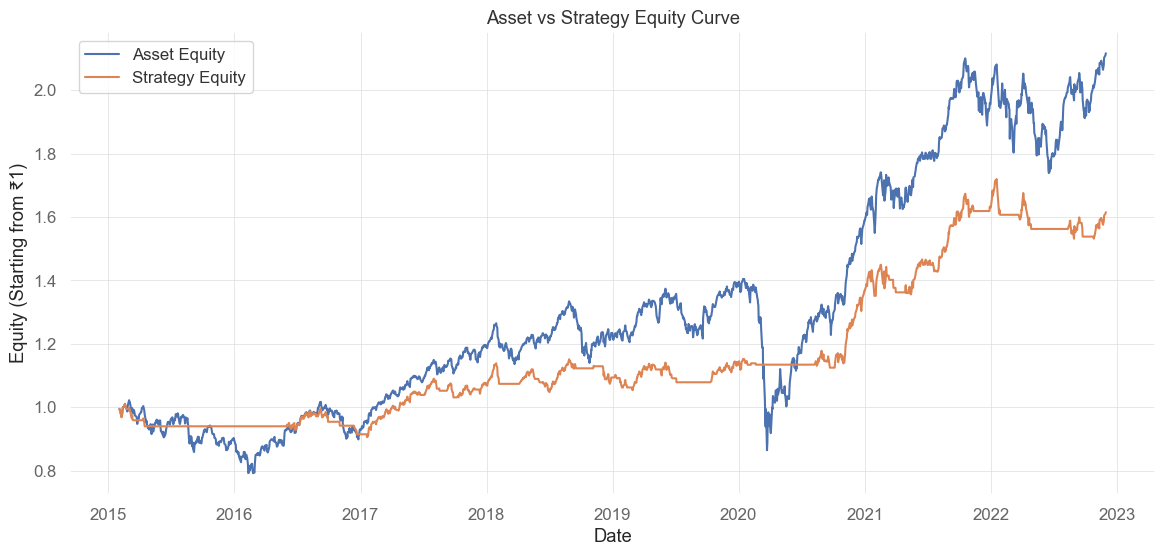

In [69]:
plt.figure(figsize=(14, 6))
plt.plot(df1.index, df1['asset_returns_eq_cum'], label='Asset Equity')
plt.plot(df1.index, df1['strategy_returns_eq_cum'], label='Strategy Equity')
plt.title("Asset vs Strategy Equity Curve")
plt.xlabel("Date")
plt.ylabel("Equity (Starting from ₹1)")
plt.legend()
plt.grid(True)
plt.show()

                     Benchmark    Strategy
-------------------  -----------  ----------
Start Period         2015-02-04   2015-02-04
End Period           2022-11-29   2022-11-29
Risk-Free Rate       0.0%         0.0%
Time in Market       100.0%       49.0%

Cumulative Return    112.62%      62.28%
CAGR﹪               10.39%       6.55%

Sharpe               0.65         0.81
Prob. Sharpe Ratio   95.98%       98.61%
Sortino              0.89         1.14
Sortino/√2           0.63         0.81
Omega                1.21         1.21

Max Drawdown         -38.44%      -10.93%
Max DD Date          2020-03-23   2022-08-29
Max DD Period Start  2020-01-15   2022-01-18
Max DD Period End    2020-11-06   2022-11-29
Longest DD Days      738          796

Gain/Pain Ratio      0.13         0.21
Gain/Pain (1M)       0.69         0.93

Payoff Ratio         0.98         0.98
Profit Factor        1.13         1.21
Common Sense Ratio   1.1          1.28
CPC Index            0.59         0.65
Tail Ratio  

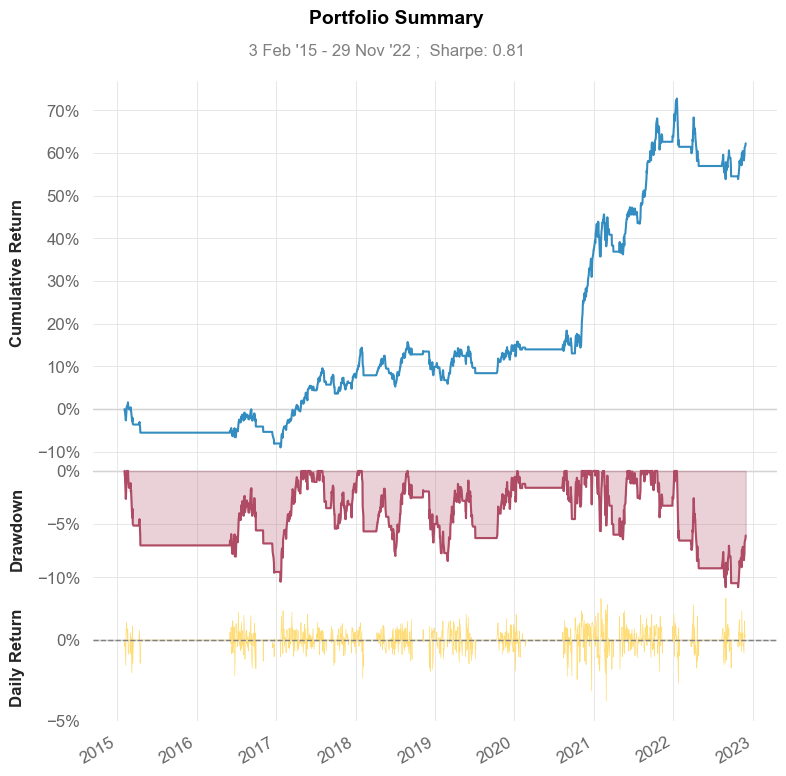

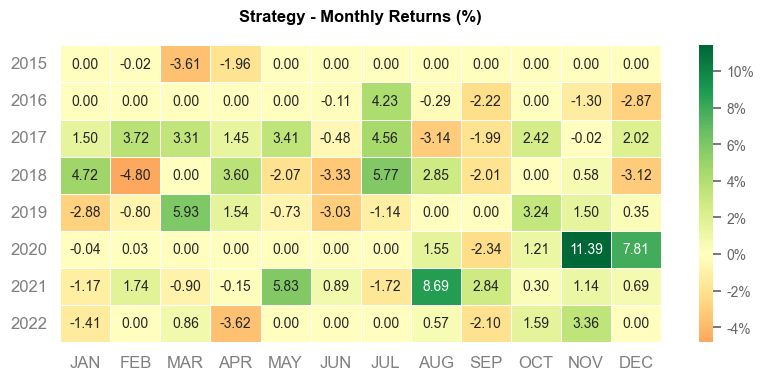

In [70]:
import quantstats as qs
qs.reports.basic(returns1, benchmark=asset1)